<h1> NumMobility Interpolation </h1>
<h2> Linear and Cubic Interpolation Examples </h2>

In [1]:
from core.TrajectoryDF import NumPandasTraj as TrajDF
import matplotlib.pyplot as plt
from preprocessing.interpolation import Interpolation as ip
from preprocessing.helpers import Helpers as helper
import utilities.constants as const
import pandas as pd

In [2]:
%%time

# atlantic = pd.read_csv('./data/atlantic.csv')
# atlantic = con.convert_directions_to_degree_lat_lon(atlantic, 'Latitude',"Longitude")
# def convert_to_datetime(row):
#         this_date = '{}-{}-{}'.format(str(row['Date'])[0:4], str(row['Date'])[4:6], str(row['Date'])[6:])
#         this_time = '{:02d}:{:02d}:00'.format(int(row['Time']/100), int(str(row['Time'])[-2:]))
#         return '{} {}'.format(this_date, this_time)
# atlantic['DateTime'] = atlantic.apply(convert_to_datetime, axis=1)
# sample = TrajDF(atlantic,
#                 latitude='Latitude',
#                 longitude='Longitude',
#                 datetime='DateTime',
#                 traj_id='ID',
#                 rest_of_columns=[])
gulls = pd.read_csv('./data/gulls.csv')
sample = TrajDF(gulls,
                latitude='location-lat',
                longitude='location-long',
                datetime='timestamp',
                traj_id='tag-local-identifier',
                rest_of_columns=[])
# rf = pd.read_csv('./data/geolife_sample.csv')
# sample = TrajDF(rf, 'lat', 'lon', 'datetime', 'id')

CPU times: user 297 ms, sys: 34.5 ms, total: 331 ms
Wall time: 330 ms


In [3]:
%%time

linear = ip.interpolate_position(dataframe=sample,
                                time_jump=3600*4)
print(f"Original DF length: {len(sample)}")
print(f"Linear Original DF length: {len(linear)}")

Original DF length: 89869
Linear Original DF length: 157775
CPU times: user 262 ms, sys: 99.8 ms, total: 362 ms
Wall time: 44.7 s


In [4]:
%%time

cubic = ip.interpolate_position(dataframe=sample,
                                time_jump=3600*4,
                                ip_type='cubic')
print(f"Original DF length: {len(sample)}")
print(f"Cubic Interpolated DF length: {len(cubic)}")

Original DF length: 89869
Cubic Interpolated DF length: 157775
CPU times: user 250 ms, sys: 101 ms, total: 351 ms
Wall time: 42.4 s


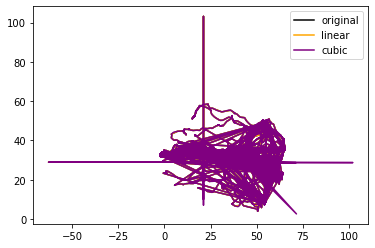

In [5]:
plt.plot(sample[const.LAT],sample[const.LONG], color='black'),
plt.plot(linear[const.LAT], linear[const.LONG], color='orange'),
plt.plot(cubic[const.LAT], cubic[const.LONG], color='purple')

plt.legend(['original', 'linear', 'cubic'])
plt.show()

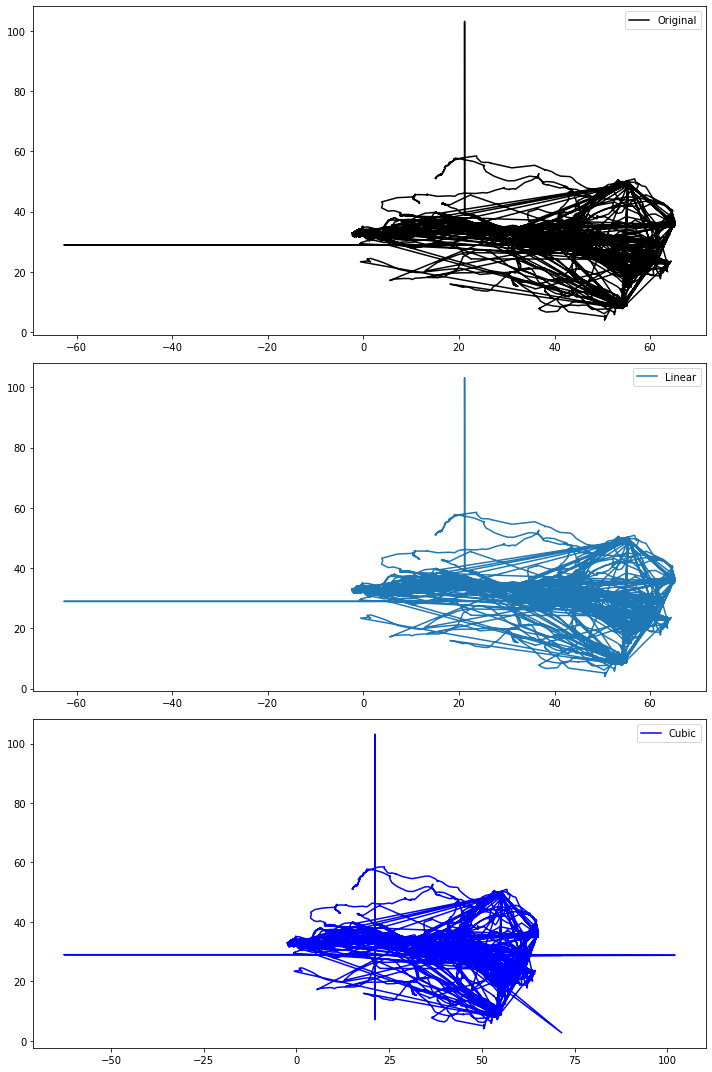

In [6]:
fig1, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))


ax1.plot(sample[const.LAT], sample[const.LONG], color='black')
ax1.legend(['Original'])
ax2.plot(linear[const.LAT], linear[const.LONG])
ax2.legend(['Linear'])
ax3.plot(cubic[const.LAT], cubic[const.LONG], color='blue')
ax3.legend(['Cubic'])
plt.tight_layout()


In [7]:
small = sample.reset_index().loc[sample.reset_index()[const.TRAJECTORY_ID] == '91732'][[const.TRAJECTORY_ID, const.DateTime, const.LAT, const.LONG]]
a = small.reset_index()[const.DateTime].diff().dt.total_seconds()
print((a > 3600*4).value_counts())

True     1501
False     469
Name: DateTime, dtype: int64


In [8]:
very_small_linear = helper._linear_help(small.reset_index(drop=True).set_index([const.DateTime]),
                            '91732', 3600*4)

In [9]:
very_small_cubic = helper._cubic_help(small.reset_index(drop=True).set_index([const.DateTime]),
                            '91732', 3600*4)

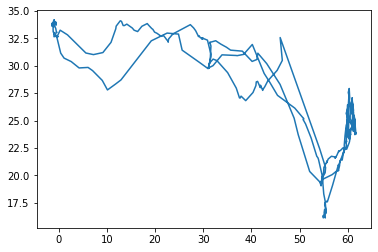

In [10]:

plt.plot(small[const.LAT], small[const.LONG])

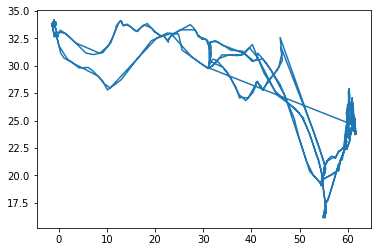

In [11]:
plt.plot(very_small_linear[const.LAT], very_small_linear[const.LONG])

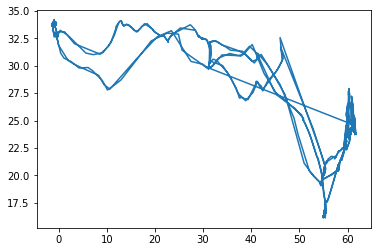

In [12]:
plt.plot(very_small_cubic[const.LAT], very_small_cubic[const.LONG])
